In [27]:
import pandas as pd
import numpy as np
#import plotly

In [28]:
#loading dataset from kaggle. this data is from campain 3 of kepler which had a lot of confirmed exoplanets.
#for my capstone i would like to use this data and concate it with other data from other sources.
#finally use it to predict the availablity of exoplanets with new data from Mikulski Archive.
df=pd.read_csv('../../../../../resource-datasets/kepler-labelled-time-series-data/exoTrain.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [29]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [30]:
#Describe
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [31]:
#There are no missing values.
df.isnull().sum().sum()

0

In [32]:
#There are no duplicates.
df.duplicated().sum()

0

In [33]:
# we can see all the columns are numeric.
df.select_dtypes(['int64','float64']).shape,df.shape

((5087, 3198), (5087, 3198))

In [34]:
#We can see a huge class imbalance in our data. for labels 2 means with exoplanet, 1 means without planet.
df.groupby('LABEL').count()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
LABEL,,,,,,,,,,,,,,,,,,,,,
1,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,...,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050
2,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


While the data seems to not need any adjusments, i believe that i need to apply many signal processing methods before i can achive reasonable accuracy. along with oversampling, filters, and try Anomaly detection techniques and many other.


Other type of data that i will use will be from Mikulski Archive. there i will be hunting for exoplanets with new data from K2.

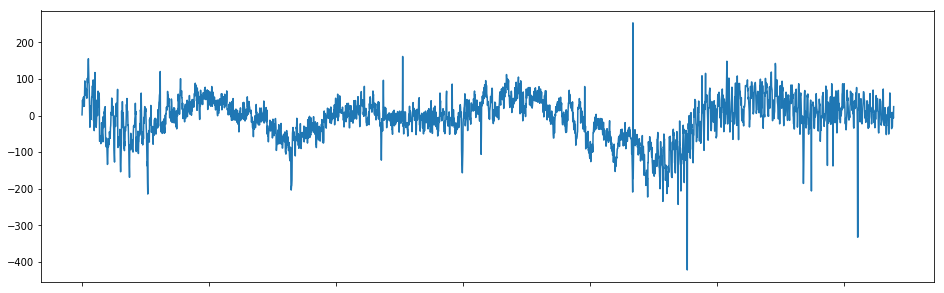

In [44]:
df.iloc[36].plot(figsize=(16,5))

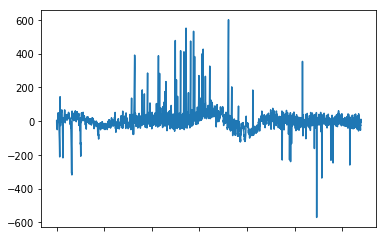

In [36]:
df.iloc[38].plot()

In [25]:
#df.iloc[37]

In [43]:
#pd.read_csv('test_data.csv')

,K2 ID,Dataset Name,Campaign,Object type,RA (J2000),Dec (J2000),Target Type,Ref,Actual Start Time,Actual End Time,...,Hip ID,Tyc ID,SDSS ID,UCAC ID,2MASS ID,2MASS Flag,Module,Output,Channel,High-Level Science Products
0,integer,string,integer,substring,ra,dec,ustring,integer,datetime,datetime,...,integer,string,string,string,string,string,integer,integer,integer,integer
1,200164267,KTWO200164267-C12,12,STAR.exoplanet,23 06 30.288,-05 02 37.30,LC,NaN,2016-12-15 20:55:31,2017-03-04 18:23:04,...,NaN,NaN,NaN,NaN,NaN,NaN,19,4,68,NaN
2,200164267,KTWO200164267-C12,12,STAR.exoplanet,23 06 30.288,-05 02 37.30,SC,NaN,2016-12-15 20:41:18,2017-03-04 18:37:17,...,NaN,NaN,NaN,NaN,NaN,NaN,19,4,68,NaN
3,201092629,KTWO201092629-C101,101,STAR.Exoplanet,12 04 57.446,-06 48 17.73,LC,NaN,2016-07-06 20:00:11,2016-07-13 01:34:37,...,NaN,4945-555-1,NaN,416-055382,12045739-0648180,NaN,22,2,74,13
4,201092629,KTWO201092629-C102,102,STAR.Exoplanet,12 04 57.446,-06 48 17.73,LC,NaN,2016-07-13 02:04:03,2016-09-20 05:06:45,...,NaN,4945-555-1,NaN,416-055382,12045739-0648180,NaN,22,2,74,13
5,201102594,KTWO201102594-C101,101,STAR.Exoplanet,11 59 20.620,-06 31 04.26,LC,NaN,2016-07-06 20:00:11,2016-07-13 01:34:37,...,NaN,NaN,NaN,418-055158,11592060-0631042,NaN,22,3,75,13
6,201102594,KTWO201102594-C102,102,STAR.Exoplanet,11 59 20.620,-06 31 04.26,LC,NaN,2016-07-13 02:04:03,2016-09-20 05:06:45,...,NaN,NaN,NaN,418-055158,11592060-0631042,NaN,22,3,75,13
7,201110617,KTWO201110617-C101,101,STAR.Exoplanet,12 10 48.043,-06 17 39.14,LC,NaN,2016-07-06 20:00:11,2016-07-13 01:34:37,...,NaN,NaN,NaN,419-054831,12104805-0617391,NaN,17,4,60,13
8,201110617,KTWO201110617-C102,102,STAR.Exoplanet,12 10 48.043,-06 17 39.14,LC,NaN,2016-07-13 02:04:03,2016-09-20 05:06:45,...,NaN,NaN,NaN,419-054831,12104805-0617391,NaN,17,4,60,13
9,201128338,KTWO201128338-C101,101,STAR.Exoplanet,12 06 31.871,-05 49 38.68,LC,NaN,2016-07-06 20:00:11,2016-07-13 01:34:37,...,NaN,NaN,NaN,421-056426,12063188-0549386,NaN,22,1,73,13
